# 4章 形態素解析
MeCabで形態素解析する
./data/neko.txt → ./data/neko.text.mecab

## 30. 形態素解析結果の読み込み
neko.txt.mecabを読み込みプログラムを作成する。
各形態素は表層形(surface)、基本形(base)、品詞(pos)、品詞細分類1(pos1)をキーとするハッシュ型とする。1文はこのリストとする。

In [11]:
DATA_PATH = "./data/neko.txt.mecab"

In [12]:
def create_datadict():
    result_list = []
    word_info_list = []
    with open(DATA_PATH) as f:
        for line in f:
            if line != "EOS\n":
                groups = line.split('\t')
                if len(groups) == 2 and groups[0] != '':
                    details = groups[1].split(',')
                    word_info = {"surface": groups[0], "base": details[6], "pos": details[0], "pos1": details[1]}
                    word_info_list.append(word_info)
            else:
                result_list.append(word_info_list)
                word_info_list = []
    return result_list

In [13]:
data_list = create_datadict()

for w in data_list[5]:
    print(w)

{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}
{'surface': 'どこ', 'base': 'どこ', 'pos': '名詞', 'pos1': '代名詞'}
{'surface': 'で', 'base': 'で', 'pos': '助詞', 'pos1': '格助詞'}
{'surface': '生れ', 'base': '生れる', 'pos': '動詞', 'pos1': '自立'}
{'surface': 'た', 'base': 'た', 'pos': '助動詞', 'pos1': '*'}
{'surface': 'か', 'base': 'か', 'pos': '助詞', 'pos1': '副助詞／並立助詞／終助詞'}
{'surface': 'とんと', 'base': 'とんと', 'pos': '副詞', 'pos1': '一般'}
{'surface': '見当', 'base': '見当', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': 'が', 'base': 'が', 'pos': '助詞', 'pos1': '格助詞'}
{'surface': 'つか', 'base': 'つく', 'pos': '動詞', 'pos1': '自立'}
{'surface': 'ぬ', 'base': 'ぬ', 'pos': '助動詞', 'pos1': '*'}
{'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}


## 31. 動詞 

In [14]:
data_dict = create_datadict()
varb_set = set()

for sentence in data_dict:
    for word in sentence:
        if word["pos"] == "動詞":
            varb_set.add(word["surface"])

for v in list(varb_set)[:30]:
    print(v)

冒し
逢い
見つけ
開ける
受け合え
さり
見て取っ
直る
なぐりつける
衰え
障っ
わかれ
さすっ
あつかっ
繙く
やってのける
知れ
降さ
化ける
鳴
引き受け
ぶら下がっ
つき
よそい
待つ
眠っ
ござっ
抑え
垂らす
掛


## 32. 動詞の原型

In [15]:
data_dict = create_datadict()
varb_set = set()

for sentence in data_dict:
    for word in sentence:
        if word["pos"] == "動詞":
            varb_set.add(word["base"])

for v in list(varb_set)[:30]:
    print(v)

入れ違う
開ける
つけ込む
考え付く
直る
なぐりつける
まかる
繙く
やってのける
司る
化ける
尽きる
待つ
ゆるめる
唸る
垂らす
あびる
ます
ゆる
相成る
すまう
差し支える
乗り越す
聴く
被う
見上ぐ
いがみ合う
したがう
極め込む
捨てる


## 33. 二つの名詞が「の」で連接されている名詞句

In [16]:
data_dict = create_datadict()
nounblock_list = []

for sentence in data_dict:
    temp_noun = ""
    for i in range(2, len(sentence)):
        if sentence[i-2]["pos"]=="名詞" and sentence[i-1]["surface"]=="の" and sentence[i]["pos"]=="名詞":
            nounblock_list.append(sentence[i-2]["surface"] + sentence[i-1]["surface"] + sentence[i]["surface"])

for nb in nounblock_list[:30]:
    print(nb)

彼の掌
掌の上
書生の顔
はずの顔
顔の真中
穴の中
書生の掌
掌の裏
何の事
肝心の母親
藁の上
笹原の中
池の前
池の上
一樹の蔭
垣根の穴
隣家の三
時の通路
一刻の猶予
家の内
彼の書生
以外の人間
前の書生
おさんの隙
おさんの三
胸の痞
家の主人
主人の方
鼻の下
吾輩の顔


## 34. 名詞の連接
連続して出現する名詞を最長一致で出力する

In [17]:
data_dict = create_datadict()
noungroup_list = []

def save_connected_noumn(wordlist, noungroup_list):
    if len(wordlist) >= 2:
        noungroup_list.append("".join(wordlist))

for sentence in data_dict:
    temp_nounlist = []
    for word in sentence:
        if word["pos"]=="名詞":
            temp_nounlist.append(word["surface"])
        else:
            save_connected_noumn(temp_nounlist, noungroup_list)
            temp_nounlist = []
    save_connected_noumn(temp_nounlist, noungroup_list)
    temp_nounlist = []

for nb in noungroup_list[:30]:
    print(nb)

人間中
一番獰悪
時妙
一毛
その後猫
一度
ぷうぷうと煙
邸内
三毛
書生以外
四五遍
この間おさん
三馬
御台所
まま奥
住家
終日書斎
勉強家
勉強家
勤勉家
二三ページ
主人以外
限り吾輩
朝主人
一番心持
二人
一つ床
一人
最後大変
——猫


## 35. 単語の出現頻度

In [18]:
def create_surfacelist():
    surface_list = []
    with open(DATA_PATH) as f:
        for line in f:
            if line != "EOS\n":
                groups = line.split('\t')
                if len(groups) == 2 and groups[0] != '' and groups[0] != '\u3000':
                    details = groups[1].split(',')
                    surface_list.append(groups[0])
    return surface_list

In [19]:
import collections

surface_list = create_surfacelist()

word_counter = collections.Counter(surface_list)

print(word_counter.most_common(30))

[('の', 9194), ('。', 7486), ('て', 6868), ('、', 6772), ('は', 6420), ('に', 6243), ('を', 6071), ('と', 5508), ('が', 5337), ('た', 3988), ('で', 3806), ('「', 3231), ('」', 3225), ('も', 2479), ('ない', 2390), ('だ', 2363), ('し', 2322), ('から', 2032), ('ある', 1728), ('な', 1613), ('ん', 1568), ('か', 1530), ('いる', 1249), ('事', 1207), ('へ', 1034), ('う', 992), ('する', 992), ('もの', 981), ('君', 973), ('です', 973)]


## 36. 頻度上位5語を図示

<BarContainer object of 10 artists>

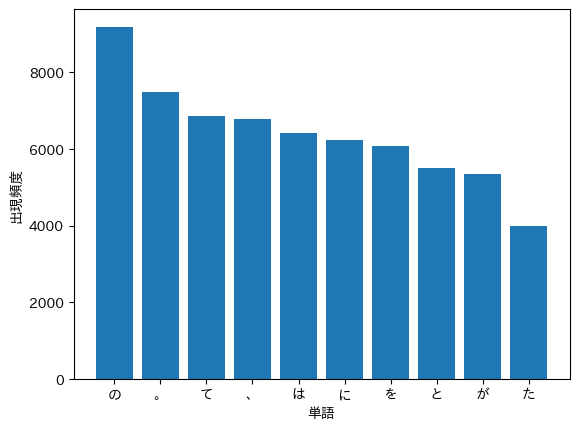

In [24]:
import collections
import matplotlib.pyplot as plt
import japanize_matplotlib

surface_list = create_surfacelist()
word_counter = collections.Counter(surface_list)

graph_datas = word_counter.most_common(10)
labels, values = zip(*graph_datas)

plt.ylabel('出現頻度')
plt.xlabel('単語')
plt.bar(labels, values)

## 37. 猫と共起頻度が高い上位10語

猫の出現数：248


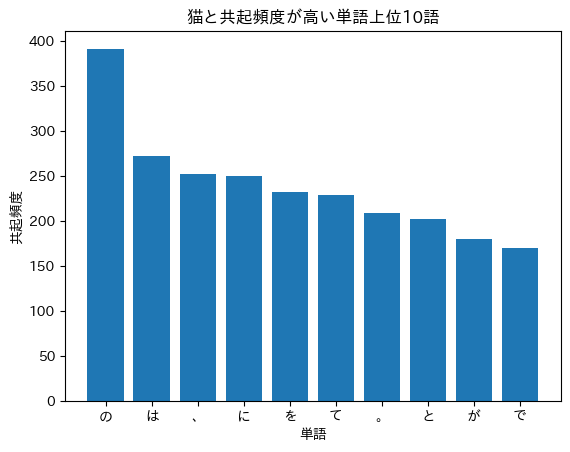

In [25]:
import collections
import matplotlib.pyplot as plt
import japanize_matplotlib


data_dict = create_datadict()
word_with_cat_dict = collections.defaultdict(int)

for sentence in data_dict:
    if "猫" in [word["surface"] for word in sentence]:
        for word in sentence:
            word_with_cat_dict[word["surface"]] += 1

cat_n = word_with_cat_dict.pop("猫", 0)
print(f"猫の出現数：{cat_n}")

word_with_cat_dict = dict(word_with_cat_dict)
word_with_cat_dict = sorted(word_with_cat_dict.items(), key=lambda v: v[1], reverse=True)

labels, values = zip(*word_with_cat_dict[:10])

plt.bar(labels, values)
plt.title("猫と共起頻度が高い単語上位10語")
plt.ylabel('共起頻度')
plt.xlabel('単語')
plt.show()

## 38. ヒストグラム

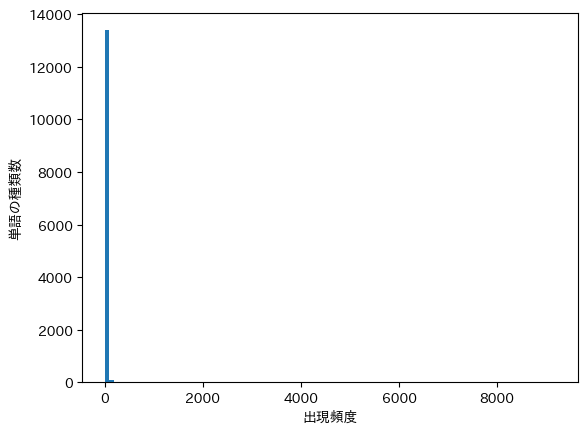

In [26]:
import collections
import matplotlib.pyplot as plt
import japanize_matplotlib

surface_list = create_surfacelist()
word_counter = collections.Counter(surface_list)

graph_datas = word_counter.most_common()
labels, values = zip(*graph_datas)

plt.hist(values, bins=100)
plt.xlabel('出現頻度')
plt.ylabel('単語の種類数')
plt.show()

## 39. Zipfの法則

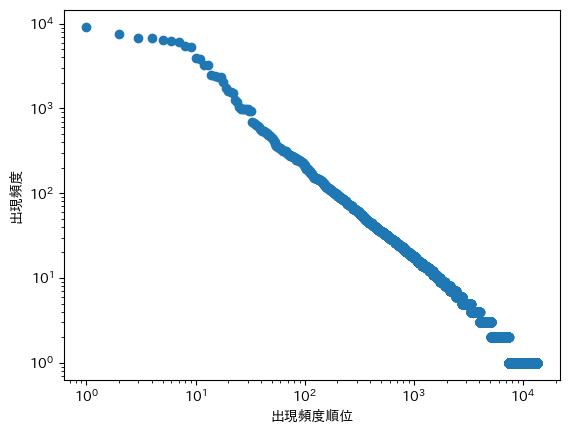

In [27]:
import collections
import matplotlib.pyplot as plt
import japanize_matplotlib

surface_list = create_surfacelist()
word_counter = collections.Counter(surface_list)

graph_datas = word_counter.most_common()
labels, values = zip(*graph_datas)

ranks = range(1, len(values)+1)

plt.scatter(ranks, values)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('出現頻度順位')
plt.ylabel('出現頻度')
plt.show()